# Handwriting Recognition: AI Explorations Final Project
## Michael Smith
### Fall 2020 - some of the following code was from Homework 2

In [1]:
#Import Required Libraries
# Graph Functions
#import tensorflow as tf
#keras = tf.keras
#%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import pandas as pd
import os
import cv2

## Import the Data
### The data is going to be the scan of the paper that will be transcribed by the script 
#### OpenCV is utilized to open the image, but matplotlib could also be used
##### Information regarding using OpenCV from https://pythonprogramming.net/image-operations-python-opencv-tutorial

## Inspect the Data
### Conduct image operations on the imported image

## Image Thresholding

In [2]:
# From : https://stackoverflow.com/questions/58382937/break-the-image-of-word-into-different-images-of-character
'''
    imutils : A series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, displaying Matplotlib images, sorting contours, detecting edges, and much more easier with OpenCV and both Python 2.7 and Python 3.
'''

# Second value: threshold value (if less than this, then set to zero)
import cv2
from imutils import contours
image_loc = 'TestImage11.jpg' # Image7.jpg, Image7_1.png
#image_loc = 'NewImage1.jpg'
image = cv2.imread(image_loc)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
thresh_not = cv2.bitwise_not(thresh)
gray_not = cv2.bitwise_not(gray)
thresh_gnot = cv2.threshold(gray_not,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
#test = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)


# dilate the white portions
#dilate = cv2.dilate(thresh, None, iterations=2)

# Need to pass a binary image through the findContours method
cnts = cv2.findContours(thresh_not, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
#cnts, _ = contours.sort_contours(cnts, method="left-to-right")
cnts, _ = contours.sort_contours(cnts, method="top-to-bottom")

folder_loc = './ROI11/'
width, height = 28, 28 
dim = (width, height)
ROI_number = 0
image_copy = image
increment = 10

for c in cnts:
    area = cv2.contourArea(c)
    if area > 25 and area < 600:
        x,y,w,h = cv2.boundingRect(c)
        ROI = 255 - image[(y-increment):y+h+increment, (x-increment):x+w+increment]
        #cv2.imwrite('./ROI/ROI_{}.png'.format(ROI_number), ROI)
        
        # Now need to resize the captured character to a 28 x 28 pixel image
        resizedROI = cv2.resize(ROI, dim)
        cv2.imwrite(folder_loc + 'ReROI_x{}_y{}.png'.format(x,y), resizedROI)
        cv2.rectangle(image_copy, (x - increment, y - increment), (x + w + increment, y + h + increment), (36,255,12), 1)
        #cv2.rectangle(image, (0, 0), (0 + w, 0 + h), (36,255,12), 1)
        # Zero, zero is the top left of the image
        ROI_number += 1
        # Maybe make a way to record the data as a label so that I know the location of each rectangle to help with letter placement
        # If i find the center of gravity of each letter and then give an up and down threshold, i could possibly align each character by row (starting with the first column and moving right until the end of the row)
        
        #print('X: ', x)
        #print('Y: ', y)
        #break
cv2.imshow('gray', gray)
cv2.imshow('test', th3)
cv2.imshow('graynot', gray_not)
cv2.imshow('thresh', thresh)
cv2.imshow('threshg', thresh_gnot)
cv2.imshow('notthresh',thresh_not)
cv2.imshow('image', image_copy)
cv2.waitKey()



-1

## Import the TensorFlow Datasets and load the EMNIST Dataset

In [3]:
# First needed to install tensorflow-datasets (pip install tensorflow-datasets)
#**************************************************************
# This is from the tensorflowblog : https://blog.tensorflow.org/2019/02/introducing-tensorflow-datasets.html
# tfds.load fetches the DatasetBuilder by name, calls the download_and_prepare(), and then calls as_dataset()
# Since the emnist dataset is so large, the entire thing cannot be loaded and cached to memory
#  therefore, I need to split the training and testing data into smaller increments
#  this can be done with the following line 
#  img_train, label_train = tfds.as_numpy(tfds.load('emnist', split='train[:10%]',batch_size=-1,as_supervised=True))
import tensorflow_datasets as tfds
# When I run the following lines, the cpu approaches 100% use and my memory is around 15GiB
train_image, train_label = tfds.load("emnist", split="train",batch_size=-1, as_supervised=True) 
test_image, test_label = tfds.load("emnist", split="test",batch_size=-1, as_supervised=True)
   
# Using DatasetInfo, I can access relevant metadata <-- this is from the TensorFlow blog
#print('Train examples: ', train_info.splits['train'].num_examples)
#print(train_info.features['label'].num_classes)
#print('Test examples: ', test_info.splits['test'].num_examples)
#print(test_info.features['label'].num_classes)
# Build the input pipeline
#train_ds = train_ds.batch(128).repeat(10)
#print(ds)
   
#print('Train_ds: ', train_ds)
#for value in tfds.as_numpy(train_ds):
#    train_ds_image , train_ds_label = value['image'], value['label']
   

    
    
## From :    https://www.tensorflow.org/datasets/splits 
## The first 10% of train split.
#train_10pct_ds = tfds.load('mnist', split='train[:10%]')




## Initialize all characters in emnist to the following list

In [4]:
class_character_list = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

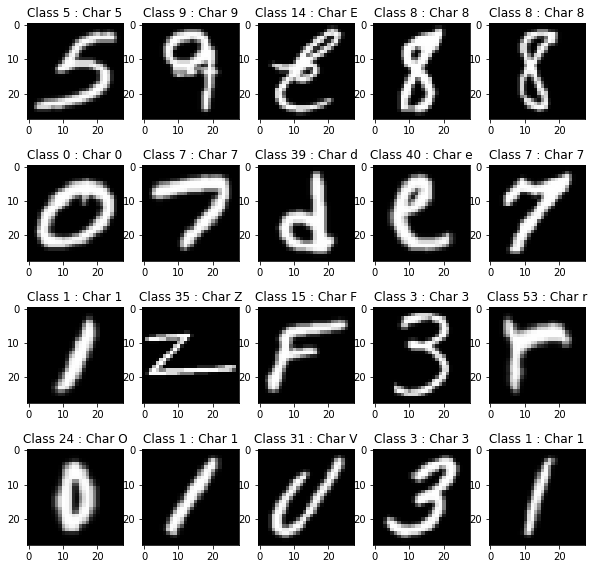

In [5]:
#print(train_images[0]['image'])\n",
# This for loop mimics the for loop in the More Deep Learning Lecture covering the MNIST dataset and Keras\n",
# The images still need to be transposed\n",
   
for i in range(20):
    plt.subplot(4,5,i+1)
    # .squeeze() removes the 3 dimension from the image making each one a (28 x 28)
    # tf.transpose() rotates the image so that it is readable
    plt.imshow(tf.transpose(tf.reshape(train_image[i],[28, 28])), cmap='gray', interpolation='none')
    plt.title("Class {fclass} : Char {fcharacter}".format(fclass = train_label[i], fcharacter = class_character_list[train_label[i]] ))
       
    # ByClass appears to be organized by numbers first, then Capitalized Letters, then Lowercase Letters
    # i.e.  Image: 0    ...    9    ...    F    ...    d    ...    e \n",
    #              ^    ...    ^    ...    ^    ...    ^    ...    ^  \n",
    #              |    ...    |    ...    |    ...    |    ...    |  \n",
    #              |    ...    |    ...    |    ...    |    ...    |  \n",
    #       Class: 0    ...    9    ...    15   ...    39   ...   40  "

In [6]:
# Experimenting
#emnist_train_images.shape()
#emnist_train_images.reshape()
print('train_image original shape', train_image.shape)
print('train_label original shape', train_label.shape)
print('test_image original shape', test_image.shape)
print('test_label original shape', test_label.shape)
#Emnist_TI = np_utils.to_categorical(emnist_train_images, test_info.features['label'].num_classes)
from keras.utils import np_utils
Train_label = np_utils.to_categorical(train_label, len(class_character_list)) 
Test_label = np_utils.to_categorical(test_label, len(class_character_list)) 


train_image original shape (697932, 28, 28, 1)
train_label original shape (697932,)
test_image original shape (116323, 28, 28, 1)
test_label original shape (116323,)


## Create CNN -- Since CNN is already created, can now skip to the bottom part of the code

In [14]:
# From: https://www.tensorflow.org/tutorials/images/cnn
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
#from keras.layers import LSTM
keras.backend.clear_session()
cnn_model = models.Sequential()
# Input shape: the images are 28 by 28 with a rgb color of 1
# Kernel size: the size of the filter matrix
cnn_model.add(Conv2D(1, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1), padding='same'))
cnn_model.add(Conv2D(1, (3,3), activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
#cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#cnn_model.add(layers.MaxPooling2D((2, 2)))
#cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(62,activation='softmax', name='preds'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 1)         17        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 1)         10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 1)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 196)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               25216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [15]:
# Compile the model
# Need to still make / get emnist_train_images, emnist_train_labels, as well as the test ones
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',#tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['binary_accuracy','categorical_accuracy'])
# Fit and train the model 
history = cnn_model.fit(train_image, Train_label, batch_size=128, epochs=10, verbose=1,
                    validation_data=(test_image, Test_label))

Epoch 1/10
5453/5453 [==============================] - 60s 11ms/step - loss: 3.9456 - binary_accuracy: 0.9839 - categorical_accuracy: 0.1768 - val_loss: 2.0113 - val_binary_accuracy: 0.9854 - val_categorical_accuracy: 0.4841
Epoch 2/10
5453/5453 [==============================] - 60s 11ms/step - loss: 2.1227 - binary_accuracy: 0.9859 - categorical_accuracy: 0.4173 - val_loss: 1.1362 - val_binary_accuracy: 0.9902 - val_categorical_accuracy: 0.6684
Epoch 3/10
5453/5453 [==============================] - 62s 11ms/step - loss: 1.6251 - binary_accuracy: 0.9876 - categorical_accuracy: 0.5402 - val_loss: 0.9638 - val_binary_accuracy: 0.9912 - val_categorical_accuracy: 0.7054
Epoch 4/10
5453/5453 [==============================] - 95s 17ms/step - loss: 1.4579 - binary_accuracy: 0.9884 - categorical_accuracy: 0.5810 - val_loss: 0.9043 - val_binary_accuracy: 0.9916 - val_categorical_accuracy: 0.7237
Epoch 5/10
5453/5453 [==============================] - 140s 26ms/step - loss: 1.3568 - binary_a

In [33]:
# This still needs work in order to save the history made above 
import pickle
with open('./SavedModels/History2.pickle', 'wb') as f:
    pickle.dump(history.history, f)

In [16]:
# Save the model
cnn_model.save('/Users/Michael/OneDrive/RIT/Fall 2020/AI Explorations/Final Project/NewCode/SavedModels/Save2')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /Users/Michael/OneDrive/RIT/Fall 2020/AI Explorations/Final Project/NewCode/SavedModels/Save2\assets


INFO:tensorflow:Assets written to: /Users/Michael/OneDrive/RIT/Fall 2020/AI Explorations/Final Project/NewCode/SavedModels/Save2\assets


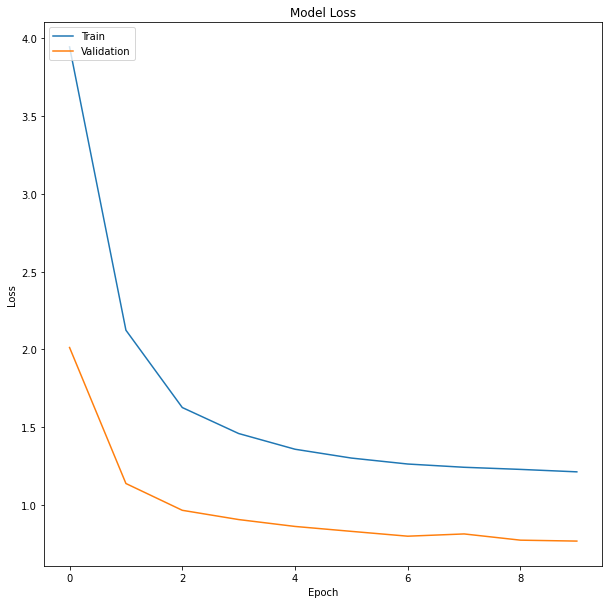

In [35]:
# Plot training and validation loss values
#with open('./SavedModels/History2.pickle') as f:
#     history_load = pickle.load(f)
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'],loc='upper left')

In [ ]:
# Test accuracy of the model
score = cnn_model.evaluate(test_image, Test_label,verbose=1)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

## Load the model <-- can skip to this part of the code when not training the model

In [36]:

from keras.models import load_model
import matplotlib.pyplot as plt
# load model
cnn_model = load_model('/Users/Michael/OneDrive/RIT/Fall 2020/AI Explorations/Final Project/NewCode/SavedModels/Save1')
# summarize model.
cnn_model.summary()
score = cnn_model.evaluate(test_image, Test_label,verbose=1)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 1)         10        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 1)         10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 1)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 196)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               25216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

## Check what was predicted in the test_images

Test Image Shape:  (116323, 28, 28, 1)
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Correct:  91855
Incorrect:  24468
Percent Correct:  78.96546684662535 %


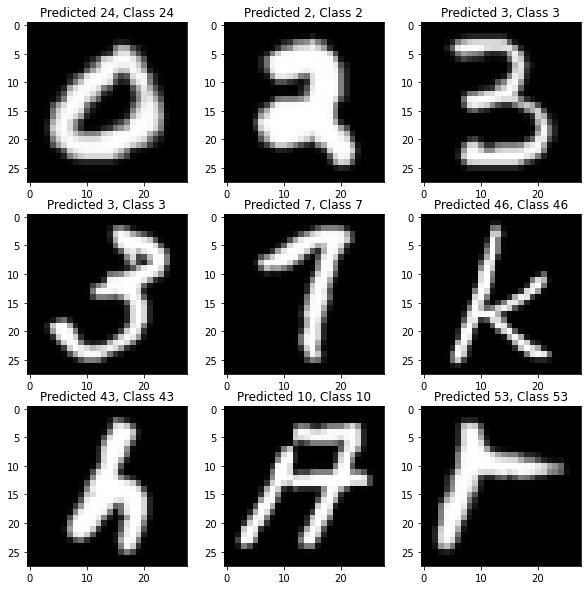

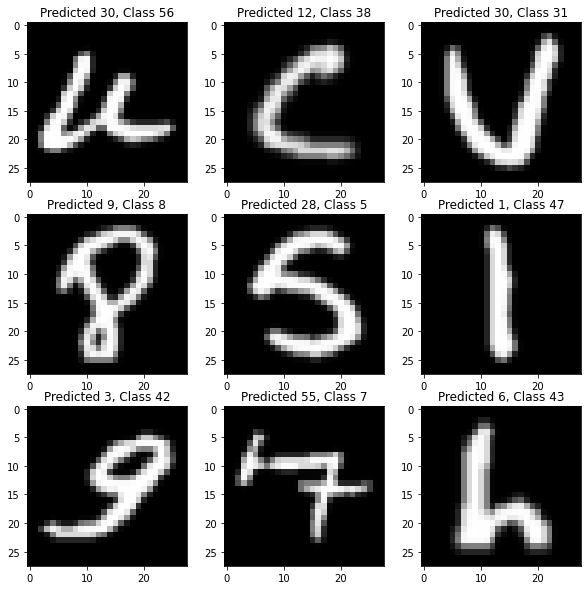

In [8]:
# Check what was predicted when reviewing the test_images
print("Test Image Shape: ", test_image.shape)
predicted_classes = cnn_model.predict_classes(test_image)

correct_indices = np.nonzero(predicted_classes == test_label)[0]
incorrect_indices = np.nonzero(predicted_classes != test_label)[0]

print("Correct: ", len(correct_indices))
print("Incorrect: ", len(incorrect_indices))
percent_correct = len(correct_indices)/(len(incorrect_indices)+len(correct_indices))
print("Percent Correct: ", percent_correct * 100, "%")

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(tf.transpose(tf.reshape(test_image[correct],[28,28])), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_label[correct]))


plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(tf.transpose(tf.reshape(test_image[incorrect],[28,28])), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_label[incorrect]))


# Prediction of handwritten characters
## First, need to rearrange the saved images as they appear in the image

In [10]:
# Once the cnn is trained and tested, the captured characters from the image from the first part of the code needs to be passed through the cnn and their values need to outputted as a string
# Loop through all of the images saved to the ROI folder
import os
import cv2
#found_hw_images = []
#found_hw_labels =[]
coordinates = []

# This for loop converts all of the images saved to the above folder into an array
for image in os.listdir(folder_loc):
    #print(image)
    val = folder_loc + image
    #print(val)
    #found_hw_images.append(cv2.imread(val,cv2.IMREAD_GRAYSCALE))
    
    
    # Now need to add the x and y values to found_image_labels list
    #print(image.find('x'))
    x_coordinate_component = []
    y_coordinate_component = []
    for letter_index in range(len(image)):
        if letter_index  > image.find('x') and letter_index < image.find('_',image.find('x')):
            x_coordinate_component.append(image[letter_index])
        elif letter_index  > image.find('y') and letter_index < image.find('.'):
            y_coordinate_component.append(image[letter_index])
    x_coordinate_component = ''.join(x_coordinate_component)
    y_coordinate_component = ''.join(y_coordinate_component)
    #print(x_coordinate_component)
    #print(y_coordinate_component)  
    coordinates.append((int(x_coordinate_component),int(y_coordinate_component),image))
    #print(coordinates)
    # Now that we have the x and y components, time to add them to a tensor
    
    #found_hw_labels.append((int(x_coordinate_component),int(y_coordinate_component),image))
    
    ####cv2.imshow('Name' + image, cv2.imread(val))
    #break
#print(found_images)
#img = cv2.imread('./ROI/ReROI_0.png',cv2.IMREAD_GRAYSCALE)
#cv2.imshow('image523', img)
#cv2.waitKey()
    #found_images.append(cv2.imread(image))
print(len(coordinates))
#print(found_hw_labels[0])



62


In [11]:
def sortByRow(data):
    #print("Data before: ", data)
    newData = sorted(data, key=lambda x:(x[1],x[0]))
    #print("New Data: ", newData)
    last_y_value = 0
    valuesInRow = []
    copyData = newData
    rows = []
    margin_of_row = 10
    #while len(copyData) > 0:
    #print("CopyDataLength: ", len(copyData))
    
    for i, value in enumerate(copyData):
        #print("******************************")
        #print("Value: ", value)
        #print(i)
        if value[1] < (last_y_value + margin_of_row) and value[1] > (last_y_value - margin_of_row):
            #print("Value: ", value)
            valuesInRow.append(value)
            last_y_value = value[1]
            #print("CopyData[i]: ", copyData[i])
            #del copyData[i]
            #print("Updated copyData: ", copyData)
        else:
            #print("Len: ", len(valuesInRow), "\n ValuesInRow: ", valuesInRow)
            rows.append(valuesInRow)
            valuesInRow = []
            valuesInRow.append(value)
            last_y_value = value[1]
    # Add the last row to rows
    rows.append(valuesInRow)
                  
    #print("Rows: ", rows)
    sortedRows = []
    for row in rows:
        sortedRow = sorted(row, key=lambda x:(x[0],x[1]))
        sortedRows.append(sortedRow)
    return sortedRows

In [12]:
sortedCoordinates = sortByRow(coordinates)

sortedImageNames = []
for row in sortedCoordinates:
    #print(row)
    for imageLabel in row:
        sortedImageNames.append(imageLabel[2])
#print(sortedImageNames)

found_sorted_hw_images = []
for image in sortedImageNames:
    print(image)
    val = folder_loc + image
    #print(val)
    found_sorted_hw_images.append(cv2.imread(val,cv2.IMREAD_GRAYSCALE))
    
    
print("Length: ", len(found_sorted_hw_images))



ReROI_x51_y46.png
ReROI_x111_y46.png
ReROI_x174_y48.png
ReROI_x236_y49.png
ReROI_x282_y48.png
ReROI_x339_y47.png
ReROI_x390_y52.png
ReROI_x447_y53.png
ReROI_x492_y56.png
ReROI_x50_y108.png
ReROI_x114_y105.png
ReROI_x181_y108.png
ReROI_x233_y110.png
ReROI_x293_y111.png
ReROI_x342_y110.png
ReROI_x392_y105.png
ReROI_x437_y106.png
ReROI_x506_y102.png
ReROI_x58_y166.png
ReROI_x106_y164.png
ReROI_x180_y166.png
ReROI_x241_y165.png
ReROI_x298_y166.png
ReROI_x359_y165.png
ReROI_x410_y159.png
ReROI_x466_y157.png
ReROI_x52_y252.png
ReROI_x116_y248.png
ReROI_x171_y255.png
ReROI_x218_y249.png
ReROI_x257_y255.png
ReROI_x296_y246.png
ReROI_x341_y253.png
ReROI_x380_y247.png
ReROI_x424_y255.png
ReROI_x456_y250.png
ReROI_x491_y242.png
ReROI_x529_y244.png
ReROI_x54_y314.png
ReROI_x116_y317.png
ReROI_x173_y317.png
ReROI_x217_y313.png
ReROI_x258_y310.png
ReROI_x296_y309.png
ReROI_x332_y305.png
ReROI_x367_y302.png
ReROI_x404_y305.png
ReROI_x448_y303.png
ReROI_x488_y303.png
ReROI_x538_y301.png
ReROI_x55_y370

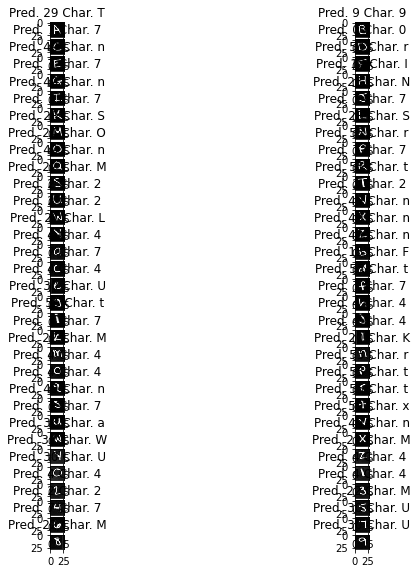

In [13]:
##### THis is the good one *****

import numpy as np
import tensorflow as tf
from tensorflow import keras

# Utilizing found_hw_images, found_hw_labels
found_tensors = []
predicted_classes = []
#print('Found_hw_images: ', found_sorted_hw_images)
image_tensors = tf.convert_to_tensor(found_sorted_hw_images, dtype=tf.float32)
image_tensors = tf.expand_dims(image_tensors, 3)
#hw_label_tensor = tf.convert_to_tensor(found_sorted_hw_labels, dtype=tf.int32)
#print("HW_label_tensor: ", hw_label_tensor.shape)





#print(image_tensors)



predicted_classes = cnn_model.predict_classes(image_tensors)
#print(image_tensors.shape)

#print(predicted_classes)

predicted_indices = np.nonzero(predicted_classes)[0]
#print("Length indices: ", len(predicted_indices))



plt.figure()
#for i, image in enumerate(predicted_indices[0:4]):
for i in range(62):
    #print(i)
    plt.subplot(32,2,i+1)
    plt.imshow(tf.reshape(image_tensors[i],[28,28]), cmap='gray', interpolation='none')
    plt.title("Pred. {} Char. {}".format(predicted_classes[i], class_character_list[predicted_classes[i]]))#,hw_label_tensor[incorrect][0]))#,hw_label_tensor[incorrect][1]))

 
#plt.figure()
#for i, correct in enumerate(correct_indices[:9]):
#    plt.subplot(3,3,i+1)
#    plt.imshow(tf.transpose(tf.reshape(test_image[correct],[28,28])), cmap='gray', interpolation='none')
#    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_label[correct]))


In [14]:
# Convert predicted_classes to ASCII
print(predicted_classes)
predicted_chars= []
for value in predicted_classes:
    predicted_chars.append(class_character_list[value])
print(predicted_chars)

# Write the predicted_chars to a txt file 
predictedText = open("PredictedText.txt","a")
predictedText.truncate(0) # Clear the file before writing to it
for character in predicted_chars:
    predictedText.write(character)
predictedText.close()

[29  9  7  0 49 53  7 18 49 23  7  7 28 28 24 53 49  7 22 55  2  2  2 49
 21 49  4 49  7 15  4 55 30  7 55  4  7  4 22 20  4 53  4 55 49 55  7 59
 36 49 32 22 30  4  4  4  2 22  7 30 22 30]
['T', '9', '7', '0', 'n', 'r', '7', 'I', 'n', 'N', '7', '7', 'S', 'S', 'O', 'r', 'n', '7', 'M', 't', '2', '2', '2', 'n', 'L', 'n', '4', 'n', '7', 'F', '4', 't', 'U', '7', 't', '4', '7', '4', 'M', 'K', '4', 'r', '4', 't', 'n', 't', '7', 'x', 'a', 'n', 'W', 'M', 'U', '4', '4', '4', '2', 'M', '7', 'U', 'M', 'U']


## Compare the saved txt file to the answer_sheet.txt



In [17]:
# compare predictedText.txt to Text2Compare2.txt
import difflib
from difflib import SequenceMatcher

text1 = open('predictedText.txt').read()
text2 = open('Text2Compare2.txt').read()

# Find the similarities between text1 and text2
similarity = SequenceMatcher(None, text1, text2).ratio()
print("Percentage similar: ", similarity * 100, "%")



Percentage similar:  3.225806451612903 %


In [146]:
# Now need to make a better hw_test_image <-- the handwritten document picture <-- the opencv contours function must be able to see all characters clearly
# Need to expand the layers and components of the CNN model <-- to predict it better
# Need to make a text file with a transcribed version of the hw_test_image
# Make a function that organizes the found_hw_images based on location
# Make a function that takes all of the predicted letters and turns that into a text file (save predicted character and x and y coordinates)
# Make a function that compares the predicted letters to the letters in the text files
    ## Return a percentage correct

# Notes:
    # * It is critical that all characters are picked up by the opencv contours function <-- if not, all of the characters will be off
    